In [50]:
'department_name', 'garment_group_name',  'section_name', 'index_group_name', 'colour_group_name', 'perceived_colour_master_name', 'perceived_colour_value_name', 'graphical_appearance_name'

('department_name',
 'garment_group_name',
 'section_name',
 'index_group_name',
 'colour_group_name',
 'perceived_colour_master_name',
 'perceived_colour_value_name',
 'graphical_appearance_name')

# Word2vec

In [5]:
import pandas as pd
import numpy as np

In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

In [2]:
filepath = "GoogleNews-vectors-negative300.bin.gz"

from gensim.models import KeyedVectors
wv_from_bin = KeyedVectors.load_word2vec_format(filepath, binary=True) 
#extracting words7 vectors from google news vector
embeddings_index = {}

In [6]:
for word, vector in zip(wv_from_bin.key_to_index , wv_from_bin.vectors):
    coefs = np.asarray(vector, dtype='float32')
    embeddings_index[word] = coefs

In [7]:
## fucntion to findout the vector space of each sentence

def avg_feature_vector(sentence, model, num_features):
    words = sentence.split()
    #feature vector is initialized as an empty array
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in embeddings_index.keys():
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [81]:
def word2vec(col_list):
    col_list_vector = []
    for i in col_list:
        col_list_vector.append(avg_feature_vector(i , model= embeddings_index, num_features=300 ).tolist())
    col_list_vector = np.array(col_list_vector)  
    
    return(col_list_vector)



# Bert

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch

In [2]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')


In [3]:
def BERT(sentences):
    
    
    tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
    model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
    
    # initialize dictionary to store tokenized sentences
    tokens = {'input_ids': [], 'attention_mask': []}

    for sentence in sentences:
        # encode each sentence and append to dictionary
        new_tokens = tokenizer.encode_plus(sentence, max_length=500,
                                       truncation=True, padding='max_length',
                                       return_tensors='pt')
        tokens['input_ids'].append(new_tokens['input_ids'][0])
        tokens['attention_mask'].append(new_tokens['attention_mask'][0])

        

    # reformat list of tensors into single tensor
    tokens['input_ids'] = torch.stack(tokens['input_ids'])
    tokens['attention_mask'] = torch.stack(tokens['attention_mask'])
    
    outputs = model(**tokens)
    outputs.keys()
    
    embeddings = outputs.last_hidden_state
    embeddings
    
    embeddings.shape
    
    attention_mask = tokens['attention_mask']
    attention_mask.shape
    
    mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
    mask.shape

    
    masked_embeddings = embeddings * mask
    masked_embeddings
    
    summed = torch.sum(masked_embeddings, 1)
    summed.shape
    
    summed_mask = torch.clamp(mask.sum(1), min=1e-9)
    summed_mask.shape
    
    mean_pooled = summed / summed_mask
    
    return mean_pooled.detach().numpy()
    
    
    
    
    
    

# Embedding Analysis

In [89]:
def sim_matrix(col_list,col_list_vector):
    import numpy as np
    from sklearn.metrics import pairwise_distances
    from scipy.spatial.distance import cosine
    dist_out = 1-pairwise_distances(col_list_vector, metric="cosine")
    df= pd.DataFrame(dist_out, columns= col_list)
    df.index = col_list
    return df

In [121]:
query_sim.shape[1]

4

In [129]:
def heat_map(df, i, j):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = (i, j)

    # Displaying dataframe as an heatmap
    # with diverging colourmap as RdYlBu
    plt.imshow(df, cmap ="RdYlBu")
  
    # Displaying a color bar to understand
    # which color represents which range of data
    plt.colorbar()



    # Assigning labels of x-axis 
    # according to dataframe
    plt.xticks(range(df.shape[1]), df.columns,rotation = 90)

    # Assigning labels of y-axis 
    # according to dataframe
    plt.yticks(range(df.shape[0]), df.index)

    # Displaying the figure
    plt.show()

In [ ]:
def heat_map(df, i, j):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = (i, j)

    # Displaying dataframe as an heatmap
    # with diverging colourmap as RdYlBu
    plt.imshow(df, cmap ="RdYlBu")
  
    # Displaying a color bar to understand
    # which color represents which range of data
    plt.colorbar()



    # Assigning labels of x-axis 
    # according to dataframe
    plt.xticks(range(len(df)), df.columns)

    # Assigning labels of y-axis 
    # according to dataframe
    plt.yticks(range(len(df)), df.index)

    # Displaying the figure
    plt.show()

In [105]:
def query_heat_map(col_list,col_list_vector,query, quey_vector):
    import numpy as np
    from sklearn.metrics import pairwise_distances
    from scipy.spatial.distance import cosine
    dist_out = 1-pairwise_distances(col_list_vector,quey_vector, metric="cosine")
    df= pd.DataFrame(dist_out, columns= query)
    df.index = col_list
    return df
    

In [8]:
pro_df = pd.read_csv("articles.csv")

In [10]:
pro_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [15]:
pro_df.department_name.garment_group_name

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

In [25]:
garment_group_name = pro_df.garment_group_name.value_counts().index.tolist()

In [26]:
garment_group_name

['Jersey Fancy',
 'Accessories',
 'Jersey Basic',
 'Knitwear',
 'Under-, Nightwear',
 'Trousers',
 'Blouses',
 'Shoes',
 'Dresses Ladies',
 'Outdoor',
 'Unknown',
 'Trousers Denim',
 'Swimwear',
 'Socks and Tights',
 'Shirts',
 'Woven/Jersey/Knitted mix Baby',
 'Shorts',
 'Dresses/Skirts girls',
 'Skirts',
 'Special Offers',
 'Dressed']

In [20]:
pro_df.section_name.value_counts()

Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                         1760
Divided Accessories      

In [21]:
pro_df.index_group_name.value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [31]:
graphical_appearance_name = pro_df.graphical_appearance_name.value_counts().index.tolist()

In [49]:
graphical_appearance_name

['Solid',
 'All over pattern',
 'Melange',
 'Stripe',
 'Denim',
 'Front print',
 'Placement print',
 'Check',
 'Colour blocking',
 'Lace',
 'Other structure',
 'Application/3D',
 'Embroidery',
 'Mixed solid/pattern',
 'Glittering/Metallic',
 'Jacquard',
 'Sequin',
 'Dot',
 'Treatment',
 'Other pattern',
 'Contrast',
 'Metallic',
 'Chambray',
 'Slub',
 'Transparent',
 'Mesh',
 'Neps',
 'Unknown',
 'Argyle',
 'Hologram']

In [96]:
graphical_appearance_vector = word2vec(graphical_appearance_name)

In [97]:
graphical_appearance_similarity = sim_matrix(graphical_appearance_name, graphical_appearance_vector)

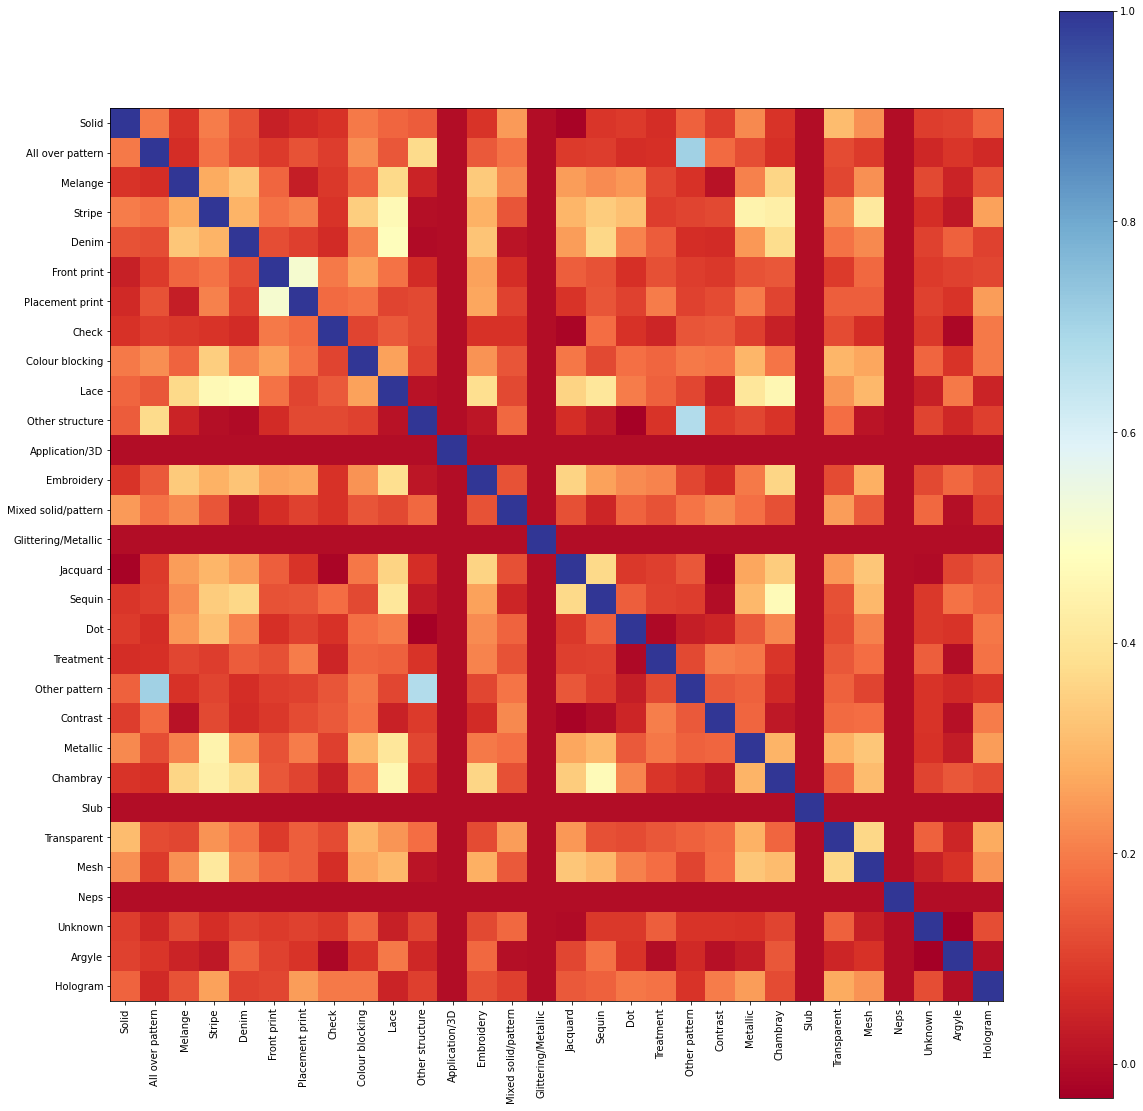

In [130]:
heat_map(graphical_appearance_similarity,20,20)

In [137]:
mod_graphical_appearance_name = []
for i in graphical_appearance_name:
    mod_graphical_appearance_name.append(str(i) + " " + "cloth")

In [138]:
mod_graphical_appearance_name_vector = word2vec(mod_graphical_appearance_name)

In [139]:
mod_graphical_appearance_name_vector_sim = sim_matrix(mod_graphical_appearance_name,mod_graphical_appearance_name_vector)

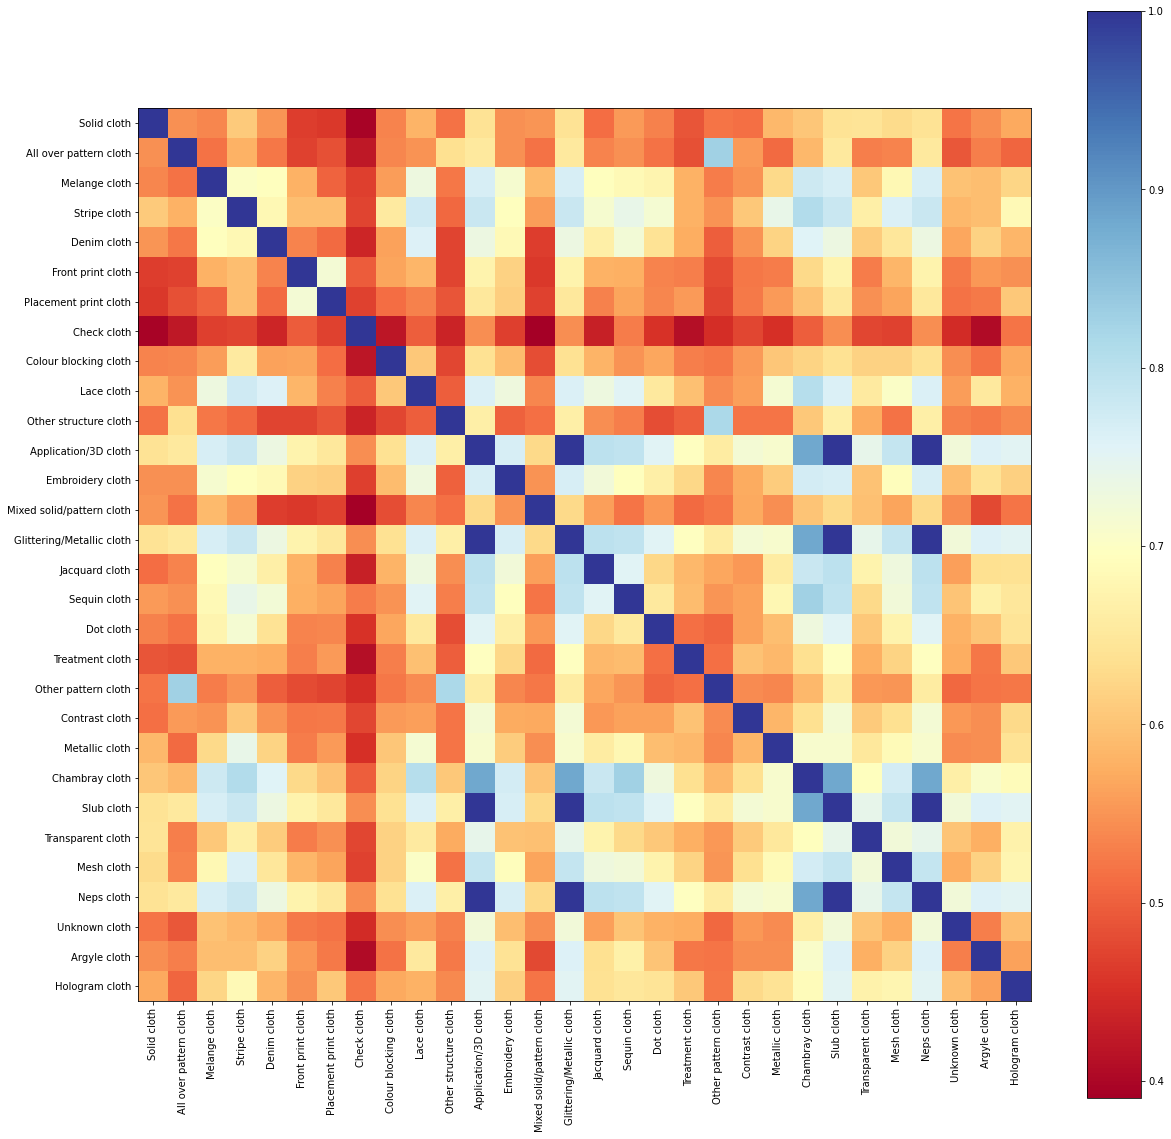

In [140]:
heat_map(mod_graphical_appearance_name_vector_sim,20,20)

In [141]:
query = ['check shirt', 'striped tshirt', 'polka dot shirt', 'floral print shirt']
query_vector = word2vec(query)

In [142]:
query_sim_2 = query_heat_map(mod_graphical_appearance_name,mod_graphical_appearance_name_vector,query, query_vector)
display(query_sim_2)

,check shirt,striped tshirt,polka dot shirt,floral print shirt
Solid cloth,0.233902,0.327647,0.259484,0.308987
All over pattern cloth,0.297873,0.352300,0.304981,0.381658
Melange cloth,0.228670,0.376754,0.300235,0.439771
Stripe cloth,0.265903,0.503166,0.329597,0.484769
Denim cloth,0.317536,0.464509,0.317764,0.470955
Front print cloth,0.287988,0.358763,0.262532,0.572814
Placement print cloth,0.273619,0.348947,0.284076,0.582250
Check cloth,0.459621,0.347881,0.264936,0.380476
Colour blocking cloth,0.204124,0.336095,0.271518,0.404261
Lace cloth,0.262573,0.450004,0.340593,0.489421


In [134]:
query_sim = query_heat_map(mod_graphical_appearance_name,mod_graphical_appearance_name_vector,query, query_vector)
display(query_sim)

,check shirt,striped tshirt,polka dot shirt,floral print shirt
Solid pattern/material cloth,0.233902,0.327647,0.259484,0.308987
All over pattern pattern/material cloth,0.297873,0.352300,0.304981,0.381658
Melange pattern/material cloth,0.228670,0.376754,0.300235,0.439771
Stripe pattern/material cloth,0.265903,0.503166,0.329597,0.484769
Denim pattern/material cloth,0.317536,0.464509,0.317764,0.470955
Front print pattern/material cloth,0.287988,0.358763,0.262532,0.572814
Placement print pattern/material cloth,0.273619,0.348947,0.284076,0.582250
Check pattern/material cloth,0.459621,0.347881,0.264936,0.380476
Colour blocking pattern/material cloth,0.204124,0.336095,0.271518,0.404261
Lace pattern/material cloth,0.262573,0.450004,0.340593,0.489421


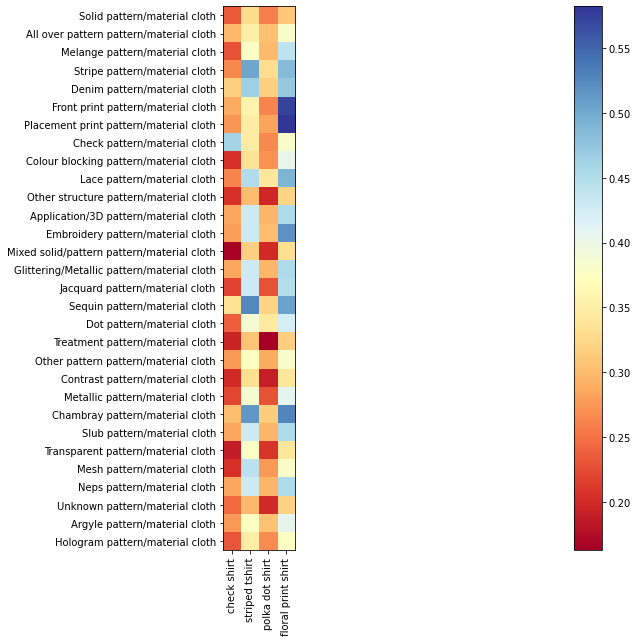

In [132]:
heat_map(query_sim,100,10)

In [136]:
query_sim_rd = query_heat_map(graphical_appearance_name,graphical_appearance_vector,query, query_vector)
display(query_sim_rd)

,check shirt,striped tshirt,polka dot shirt,floral print shirt
Solid,0.043395,0.033533,0.066846,-0.014055
All over pattern,0.197909,0.173273,0.200023,0.194527
Melange,0.059463,0.139493,0.158351,0.210212
Stripe,0.132365,0.360160,0.221265,0.306093
Denim,0.216150,0.306051,0.207446,0.293914
Front print,0.185551,0.180329,0.144451,0.446346
Placement print,0.161760,0.161804,0.168041,0.447444
Check,0.349441,0.116709,0.110333,0.137862
Colour blocking,0.068140,0.139678,0.147518,0.210017
Lace,0.125821,0.272209,0.233563,0.307593


In [29]:
pro_df.perceived_colour_value_name.value_counts()

Dark            42706
Dusty Light     22152
Light           15739
Medium Dusty    12630
Bright           6471
Medium           5711
Undefined         105
Unknown            28
Name: perceived_colour_value_name, dtype: int64

In [151]:
def sementic_testing(s1, s2):
    
    from scipy import spatial
    r1 = avg_feature_vector(s1, model= embeddings_index, num_features=300 ).tolist()
    r2 = avg_feature_vector(s2 , model= embeddings_index, num_features=300 ).tolist()
    result = 1 - spatial.distance.cosine(r1, r2)
    print(result)


In [152]:
sementic_testing("floral", "lily")

0.4996888728656912


In [154]:
sementic_testing("floral", "lily tshirt")

0.48666481434203246


In [153]:
sementic_testing("floral print", "lily tshirt")

0.4476902571382517


In [155]:
sementic_testing("Checked", "check tshirt")

0.4021226641773388


In [156]:
sementic_testing("Checked", "strip tshirt")

0.14783727708853633


In [157]:
sementic_testing("Checked Cloth", "check tshirt")

0.3859863934189971


## Garment Group Name Embedding Analysis

In [158]:
garment_group_name

['Jersey Fancy',
 'Accessories',
 'Jersey Basic',
 'Knitwear',
 'Under-, Nightwear',
 'Trousers',
 'Blouses',
 'Shoes',
 'Dresses Ladies',
 'Outdoor',
 'Unknown',
 'Trousers Denim',
 'Swimwear',
 'Socks and Tights',
 'Shirts',
 'Woven/Jersey/Knitted mix Baby',
 'Shorts',
 'Dresses/Skirts girls',
 'Skirts',
 'Special Offers',
 'Dressed']

In [163]:
## modified the column entries to add the semantic meaning to it
mod_garment_group_name = []
for i in garment_group_name:
    mod_garment_group_name.append(str(i) + " " + "cloths")

print(mod_garment_group_name)

['Jersey Fancy cloths', 'Accessories cloths', 'Jersey Basic cloths', 'Knitwear cloths', 'Under-, Nightwear cloths', 'Trousers cloths', 'Blouses cloths', 'Shoes cloths', 'Dresses Ladies cloths', 'Outdoor cloths', 'Unknown cloths', 'Trousers Denim cloths', 'Swimwear cloths', 'Socks and Tights cloths', 'Shirts cloths', 'Woven/Jersey/Knitted mix Baby cloths', 'Shorts cloths', 'Dresses/Skirts girls cloths', 'Skirts cloths', 'Special Offers cloths', 'Dressed cloths']


### Embedding Using Word2vec

In [164]:
## vectorise the column text 
mod_garment_group_name_vector = word2vec(mod_garment_group_name)
garment_group_name_vector = word2vec(garment_group_name)

In [168]:
##similarity between all entries of column
grament_sim = sim_matrix(garment_group_name, garment_group_name_vector)
grament_sim_mod = sim_matrix(mod_garment_group_name, mod_garment_group_name_vector)


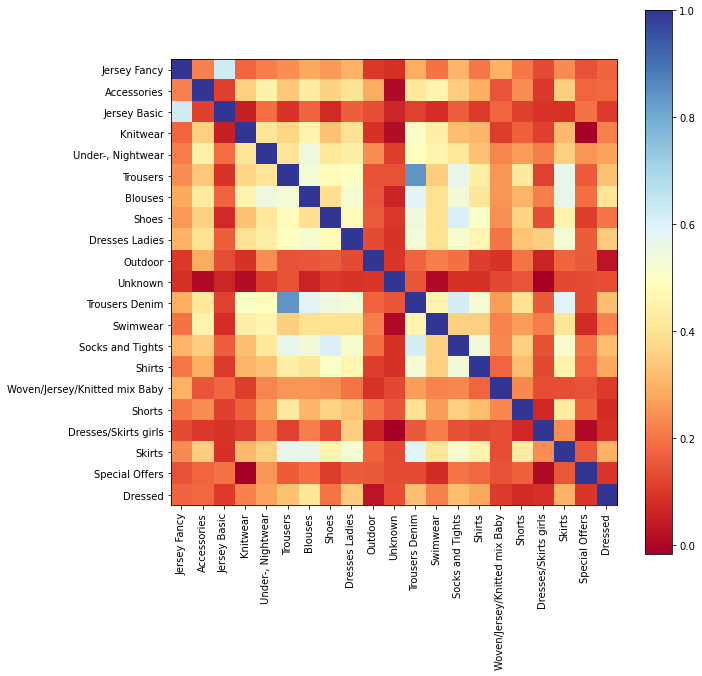

In [172]:
heat_map(grament_sim,10,10)

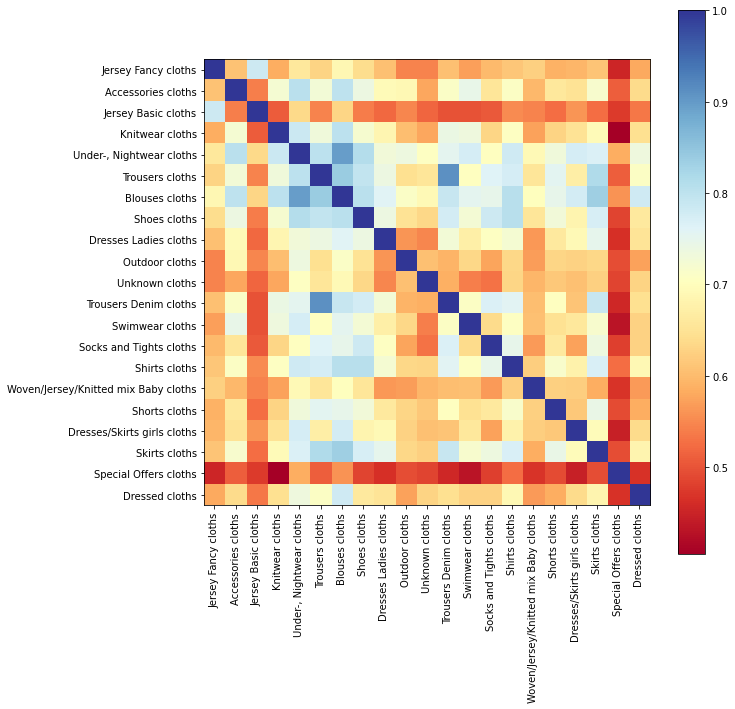

In [177]:
heat_map(grament_sim_mod,10,10)

In [199]:
sementic_testing("jersey", "winter cloths")

0.22700027922554888


In [201]:
sementic_testing("jersey", "summer cloths")

0.22058898833388718


In [202]:
sementic_testing("jersey Cloth", "winter Cloth")

0.6059054941519235


In [203]:
sementic_testing("jersey Cloth", "winter")

0.06015592617575971


In [205]:
sementic_testing("jersey Cloth", "summer Cloth")

0.612240780955351


In [208]:
sementic_testing("jersey cloth", "cloth")

0.7099159296543972


In [209]:
sementic_testing("jersey", "cloth")

0.23294738991724395


### Embedding Using Bert

In [13]:
def bert_sementic_testing(s1,s2):
    
    k = BERT([s1,s2])
    from scipy import spatial
    result = 1 - spatial.distance.cosine(k[0], k[1])
    print(result)


In [14]:
bert_sementic_testing("jersey", "winter cloths")

0.4715980589389801


In [15]:
bert_sementic_testing("jersey", "summer cloths")

0.5194889903068542


In [16]:
bert_sementic_testing("jersey", "cloth")

0.7469144463539124


In [18]:
bert_sementic_testing("jersey cloth", "winter cloth")

0.529603898525238


In [20]:
bert_sementic_testing("jersey cloth", "summer Cloth")

0.5096396207809448


### Color Embedding Analysis

In [23]:
from collections import namedtuple, OrderedDict
Color = namedtuple('RGB','red, green, blue')
colors = {} #dict of colors
class RGB(Color):
    def hex_format(self):
        
        '''Returns color in hex format'''
        return '#{:02X}{:02X}{:02X}'.format(self.red,self.green,self.blue)

In [32]:
import pandas as pd
colour_code = pd.read_csv("colour_codes.csv")

In [33]:
colour_code

,Color Name,Hex Value,RGB Value
0,aliceblue,#F0F8FF,"[240,248,255]"
1,antiquewhite,#FAEBD7,"[250,235,215]"
2,antiquewhite1,#FFEFDB,"[255,239,219]"
3,antiquewhite2,#EEDFCC,"[238,223,204]"
4,antiquewhite3,#CDC0B0,"[205,192,176]"
...,...,...,...
546,whitesmoke,#F5F5F5,"[245,245,245]"
547,yellow1,#FFFF00,"[255,255,0]"
548,yellow2,#EEEE00,"[238,238,0]"
549,yellow3,#CDCD00,"[205,205,0]"


In [35]:
color = colour_code["Color Name"].tolist()
RGB = colour_code["RGB Value"].tolist()

col_rgb = {color[i]: RGB[i] for i in range(len(color))}

In [39]:
col_rgb['yellow1']

'[255,255,0]'

In [40]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\dhrsingh\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [43]:
process.extractOne("red", color)

('indianred', 90)

In [44]:
col_rgb[process.extractOne("red", color)[0]]

'[205,92,92]'

In [46]:
query = ['Black',
'Dark Blue',
'White',
'Light Pink',
'Grey',
'Light Beige',
'Blue',
'Red',
'Light Blue',
'Greenish Khaki']

In [47]:
for i in query:
    print(i, "    ", process.extractOne(i, color)[0], "     ", process.extractOne(i, color)[1], "    ",col_rgb[process.extractOne(i, color)[0]])

Black      black       100      [0,0,0]
Dark Blue      blue       90      [0,0,255]
White      white       100      [255,255,255]
Light Pink      lightpink       95      [255,182,193]
Grey      coldgrey       90      [128,138,135]
Light Beige      beige       90      [245,245,220]
Blue      blue       100      [0,0,255]
Red      indianred       90      [205,92,92]
Light Blue      lightblue       95      [173,216,230]
Greenish Khaki      green       90      [0,128,0]
